In [71]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [72]:
data = np.loadtxt('/Users/kushagrapaliwal/Desktop/astr stuff/dataset.txt', usecols=(0, 2))  
times = np.loadtxt('/Users/kushagrapaliwal/Desktop/astr stuff/dataset.txt', usecols=1, dtype=str)

/var/folders/qb/pdvhqn0d1vjg964cqx2h5m9m0000gn/T/ipykernel_2887/2429274078.py:2: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=50000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  times = np.loadtxt('/Users/kushagrapaliwal/Desktop/astr stuff/dataset.txt', usecols=1, dtype=str)


In [73]:
def time_to_decimal(time_str):
        hh, mm = map(int, time_str.split(":"))
        return hh + mm / 60

In [74]:
decimal_hours = np.array([time_to_decimal(t) for t in times])
days = data[:, 0].astype(int)
tide_heights = data[:, 1]

sorted_indices = np.argsort(decimal_hours)  
hours_sorted = decimal_hours[sorted_indices]  
tide_sorted = tide_heights[sorted_indices]   

In [75]:
def oscillatory(t, A, f, phi, C):
    return A * np.cos(2 * np.pi * f * t + phi) + C

In [ ]:
initial_guess = [6, 1/12, 0, 2]

params, covariance = curve_fit(oscillatory, hours_sorted, tide_sorted, sigma=.25, p0=initial_guess)
A_fit, f_fit, phi_fit, C_fit = params

t_fit = np.linspace(min(hours_sorted), max(hours_sorted), 500) 
h_fit = oscillatory(t_fit, *params)



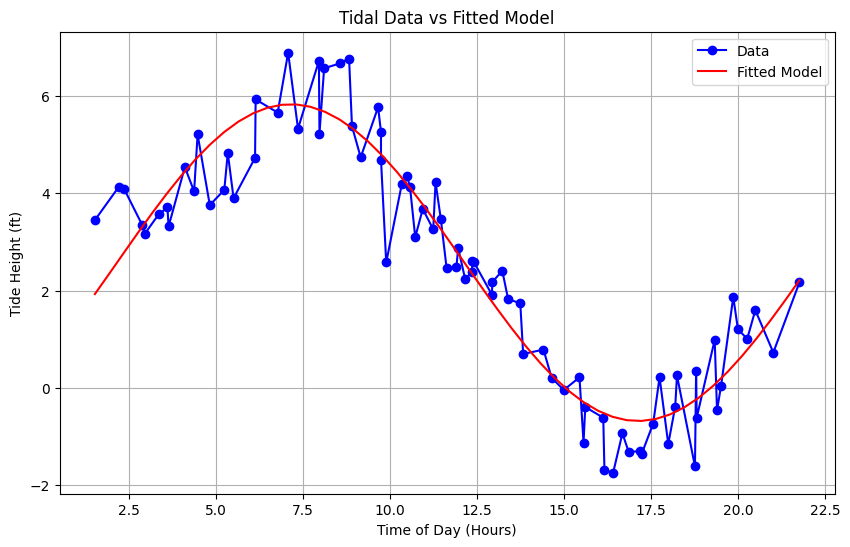

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(hours_sorted, tide_sorted, 'o-', label="Data", color='b')
plt.plot(t_fit, h_fit, label="Fitted Model", color='r')
plt.xlabel("Time of Day (Hours)")
plt.ylabel("Tide Height (ft)")
plt.title("Tidal Data vs Fitted Model")
plt.legend()
plt.grid(True)
plt.savefig("tide_model_fit.pdf")
plt.show()

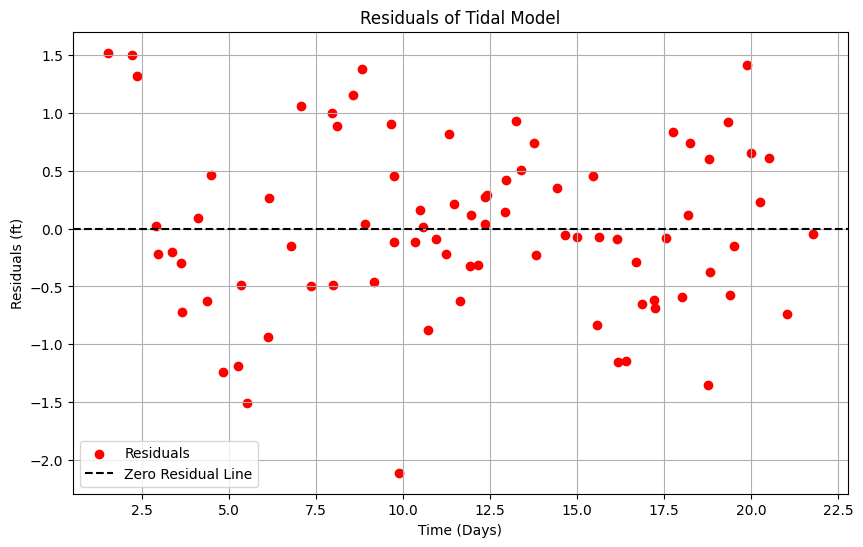

In [ ]:
residuals =  tide_sorted - oscillatory(hours_sorted, *params)

plt.figure(figsize=(10, 6))
plt.scatter(hours_sorted, residuals, color='red', label='Residuals') 
plt.axhline(0, color='black', linestyle='--', label='Zero Residual Line') 
plt.xlabel('Time (Days)')
plt.ylabel('Residuals (ft)')
plt.title('Residuals of Tidal Model')
plt.legend()
plt.grid(True)
plt.show()

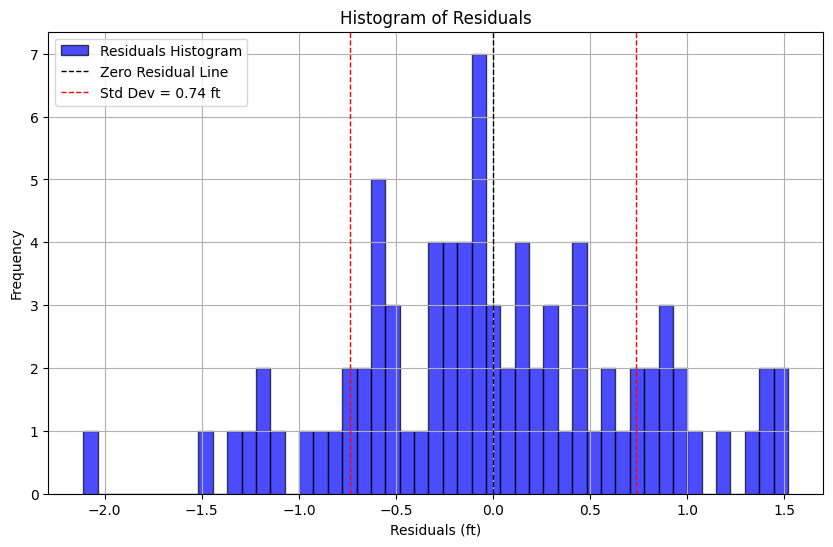

In [87]:
std_residuals = np.std(residuals, ddof=1)
error = .25

intrinsic_scatter = np.sqrt(max(std_residuals**2 - error**2, 0))

plt.figure(figsize=(10,6))
num_bins = int(np.sqrt(len(residuals)))
bins = np.linspace(min(residuals), max(residuals))

plt.hist(residuals, bins=bins, color='blue', alpha=0.7, edgecolor='black', label="Residuals Histogram")
plt.axvline(0, color='black', linestyle='--', linewidth=1, label="Zero Residual Line")
plt.axvline(std_residuals, color='red', linestyle='--', linewidth=1, label=f"Std Dev = {std_residuals:.2f} ft")
plt.axvline(-std_residuals, color='red', linestyle='--', linewidth=1)
plt.xlabel("Residuals (ft)")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.legend()
plt.grid(True)

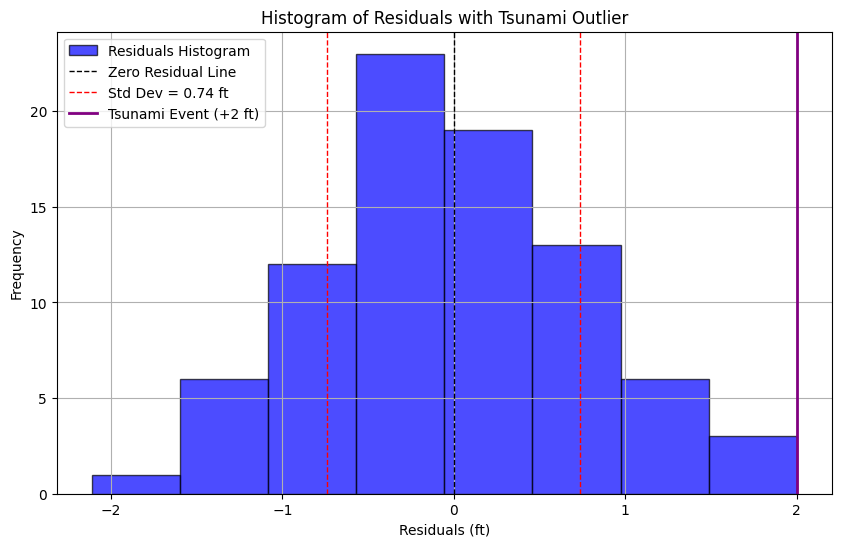

In [88]:
tsunami_deviation = 2.0  # ft


std_residuals1 = np.std(residuals, ddof=1)
num_std_devs = tsunami_deviation / std_residuals


residuals_with_tsunami = np.append(residuals, tsunami_deviation)


plt.figure(figsize=(10, 6))
num_bins1 = int(np.sqrt(len(residuals_with_tsunami)))  
bins1 = np.linspace(min(residuals_with_tsunami), max(residuals_with_tsunami), num_bins1)

plt.hist(residuals_with_tsunami, bins=bins1, color='blue', alpha=0.7, edgecolor='black', label="Residuals Histogram")
plt.axvline(0, color='black', linestyle='--', linewidth=1, label="Zero Residual Line")
plt.axvline(std_residuals, color='red', linestyle='--', linewidth=1, label=f"Std Dev = {std_residuals:.2f} ft")
plt.axvline(-std_residuals, color='red', linestyle='--', linewidth=1)
plt.axvline(tsunami_deviation, color='purple', linestyle='-', linewidth=2, label=f"Tsunami Event (+2 ft)")
plt.xlabel("Residuals (ft)")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals with Tsunami Outlier")
plt.legend()
plt.grid(True)

plt.savefig("residuals_histogram_with_tsunami.pdf")
plt.show()

